In [47]:
import sys
sys.path.append('..')
import sfp
import pyrtools as pt
import seaborn as sns
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import display

In [7]:
stimuli = np.load('../data/stimuli/task-sfp_stimuli.npy')
stim_df = pd.read_csv('../data/stimuli/task-sfp_stim_description.csv')

In [33]:
stim_idx = 0
stim = stimuli[stim_idx]
w_r = stim_df.iloc[stim_idx].w_r
w_a = stim_df.iloc[stim_idx].w_a
dx, dy, _, _ = sfp.stimuli.create_sf_maps_cpp(stim.shape[0], w_r=w_r, w_a=w_a)

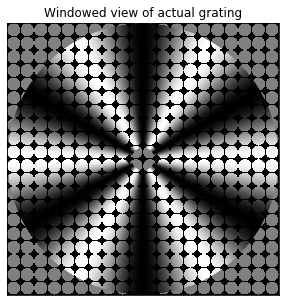

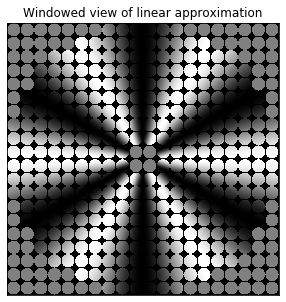

In [34]:
sfp.plotting.plot_grating_approximation(stim, dx, dy, 20, w_r=w_r, w_a=w_a);

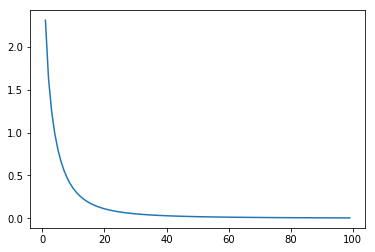

In [85]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / (x**2+y**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y), limit=100)

ys = range(1, 100)
vals = []
for y in ys:
    vals.append(integrated_dx(1, y)[0])
plt.plot(ys, vals)

In [123]:
dxdy_to_integrate(10, 10, 1)

-0.005

In [116]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / (x**2+y**2)
def dy_to_integrate(y, w_r, x):
    return (w_r*y) / ((x**2+y**2))
def dxdy_to_integrate(y, x, w_r):
    return (-2*x*w_r*y) / ((x**2+y**2)**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y))
integrated_dy = lambda w_r, y: quad(dy_to_integrate, 0, y, args=(w_r, 10))
integrated_dxdy = lambda w_r, y: nquad(dxdy_to_integrate, [[0, y], [0, 10]], args=(w_r,))

In [ ]:
ys = range(1, 100)
vals = []
for y in ys:
    vals.append((integrated_dx(1, y)[0] + integrated_dy(1, y)[0] - integrated_dxdy(1, y)[0]))
plt.plot(ys, vals)

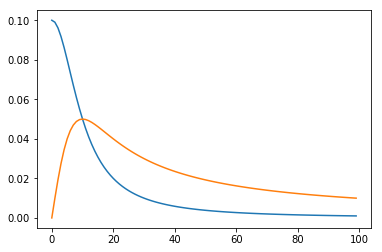

In [94]:
def dx_to_integrate(x, w_r, y):
    return (w_r*x) / ((x**2+y**2))
def dy_to_integrate(y, w_r, x):
    return (w_r*y) / ((x**2+y**2))

ys = range(100)
vals = []
for y in ys:
    vals.append((dx_to_integrate(10, 1, y), dy_to_integrate(y, 1, 10)))
plt.plot(ys, vals)

In [66]:
def orig_func(x, y, w_a, w_r, phi=0):
    lrad = np.log2(x**2+y**2)
    theta = np.arctan2(y, x)
    return ((w_r * np.log(2))/2) * lrad + w_a * theta + phi

In [68]:
import scipy.misc as misc

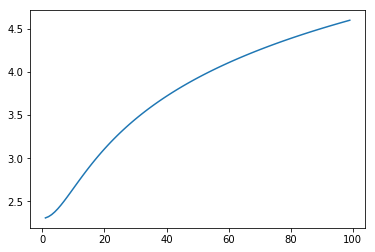

In [86]:
w_r = 1
w_a = 0
x = 10
ys = range(1,100)
vals = []
for y in ys:
    vals.append(orig_func(x, y, w_a, w_r))
plt.plot(ys, vals)

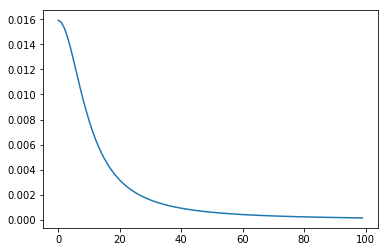

In [77]:
def dx_to_integrate(x, w_r, y):
    return (w_r*y) / (x**2+y**2)

integrated_dx = lambda w_r, y: quad(dx_to_integrate, 0, 10, args=(w_r, y))

ys = range(100)
vals = []
for y in ys:
    vals.append(sfp.stimuli._calc_sf_analytically(10, y, w_r=1, w_a=0)[0])
plt.plot(ys, vals)

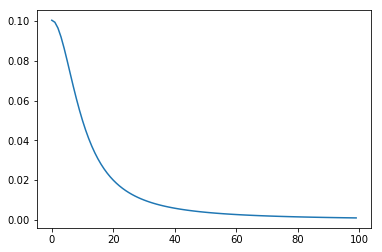

In [70]:
w_r = 1
w_a = 0
x = 10
ys = range(100)
vals = []
for y in ys:
    vals.append(misc.derivative(orig_func, 10, args=(y, w_a, w_r)))
plt.plot(ys, vals)

In [7]:
w_a = sympy.Symbol('w_a')
w_r = sympy.Symbol('w_r')
#r = sympy.Symbol('r')
#theta = sympy.Symbol('theta')
x = sympy.Symbol('x')
y = sympy.Symbol('y')
r = sympy.sqrt(x**2+y**2)
theta = sympy.atan2(y,x)

$\frac{\partial f}{\partial x}=\omega_x(x_0,y_0)=
\frac{y_0\omega_r+x_0\omega_a}{2\pi(x_0^2+y_0^2)}$


$\frac{\partial f}{\partial
  y}=\omega_y(x_0,y_0)=\frac{x_0\omega_r-y_0\omega_a}{2\pi(x_0^2+y_0^2)}$

Standard version:

In [101]:
dx = (w_r*y + w_a*x) / ((x**2+y**2))
dy = (w_r*x - w_a*y) / ((x**2+y**2))

dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt((w_a**2 + w_r**2)/(x**2 + y**2))

atan((-w_a*y + w_r*x)/(w_a*x + w_r*y))

with $w_r=0$

In [79]:
dx = (w_a*x) / ((x**2+y**2))
dy = (-w_a*y) / ((x**2+y**2))
dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt(w_a**2/(x**2 + y**2))

-atan(y/x)

with $w_a=0$

In [8]:
dx = (w_r*y) / ((x**2+y**2))
dy = (w_r*x) / ((x**2+y**2))
dr = sympy.sqrt(sympy.factor(dx**2+dy**2))
dtheta = sympy.atan(dy/dx)
display(dr)
display(dtheta)

sqrt(w_r**2/(x**2 + y**2))

atan(x/y)

In [125]:
dr*sympy.cos(dtheta)

sqrt(w_r**2/(x**2 + y**2))/sqrt(x**2/y**2 + 1)

In [130]:
dx.evalf(subs={w_r:1, x:10, y:20})

0.0400000000000000

In [129]:
(dr*sympy.cos(dtheta)).evalf(subs={w_r: 1, x: 10, y: 20})

0.0400000000000000